### Duplicate Handling

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [28]:
df.value_counts()

brand    style  rating
Yum Yum  cup    4.0       2
Indomie  cup    3.5       1
         pack   5.0       1
                15.0      1
Name: count, dtype: int64

In [29]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [30]:
df.drop_duplicates(inplace=True)
print(df)



     brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0




<br>

### Outliers Handling

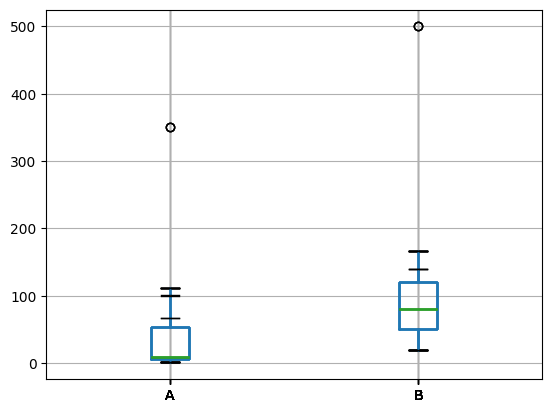

In [41]:
df = pd.DataFrame({
    'A': [1, 23, 4, 5, 53, 6, 7, 8, 9, 10, 67, 60, 350],
    'B': [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130, 140, 500]
})
df.boxplot()
plt.show()
plt.close()

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [44]:
df_trim = df[~((df<(Q1<0.5))|(df>(

SyntaxError: incomplete input (1957958262.py, line 1)

### Handling Incorrect Data

In [47]:
data = {
    'Name': ['John', 'Michael', 'Tom', 'Alex', 'Ryan'],
    'Age': [8, 9, 7, -77, 10],
    'Gender': ['M', 'M', 'Z', 'F', 'M'],
    'Standard': [3, 4, 12, 3, 5]
}
df = pd.DataFrame(data)

In [52]:
# Identify Incorrect Data
incorrect_age = data[(data['Age']<=0 | (data['Age']>100))]
incorrect_gender = data[~data['Gender'].isin(['M', 'F'])]

TypeError: '>' not supported between instances of 'list' and 'int'

### Handling inconsistent data